In [1]:
import numpy as np
import matplotlib.pyplot as plt

from simulator import *

In [2]:
trace = load_mat_array("./traces/irm_trace/compare_trace.mat")['trace0']
trace, catalog_size, sample_size = parse_trace(trace) 

In [3]:
cache_init = load_mat_array("./traces/irm_trace/init_cache.mat")['Initialize_cache']-1

New best static
LRU
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%
Elapsed time: 2.940180540084839
LFU
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%
Elapsed time: 3.7701282501220703
Best static
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%
Elapsed time: 3.8127877712249756
OGD
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%
Elapsed time: 8.515774488449097


/home/koen/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


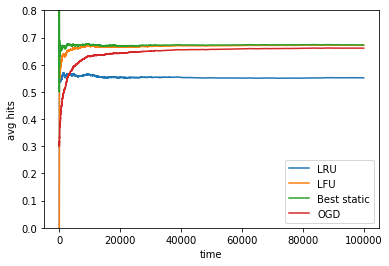

In [4]:
cache_size = int(0.3*catalog_size)
cache_LRU, cache_LFU, cache_BH, cache_OGD = simulate_trace(trace, cache_size, catalog_size, sample_size, cache_init)

In [19]:
def compare_hitrate(cache, hitrate):
    cache_hitrate = cache.get_hitrate()
    plt.plot(cache_hitrate-hitrate)
    plt.xlabel("Time")
    
matlab_hitrates = load_mat_array("./traces/irm_trace/hitrates.mat")

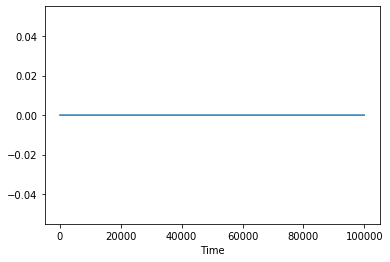

In [20]:
compare_hitrate(cache_LRU, matlab_hitrates['LRU_hitrate'])

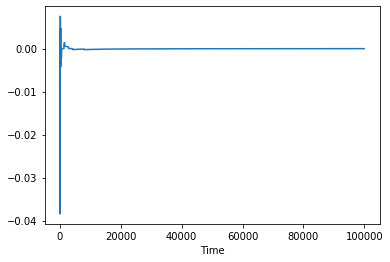

In [21]:
compare_hitrate(cache_LFU, matlab_hitrates['LFU_hitrate'])
# list(np.nonzero(cache_LFU.get_hitrate()-matlab_hitrates['LFU_hitrate']))
# cache_LFU.get_hitrate()[21:]
# plt.plot(cache_LFU.hits[:100])

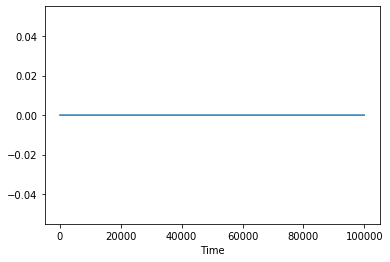

In [22]:
compare_hitrate(cache_BH, matlab_hitrates['BH_hitrate'])

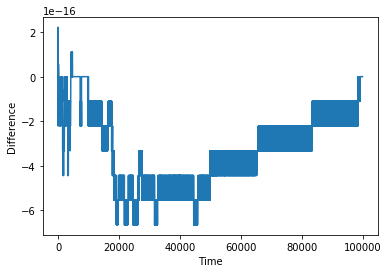

In [18]:
compare_hitrate(cache_OGD, matlab_hitrates['OGD_hitrate'])